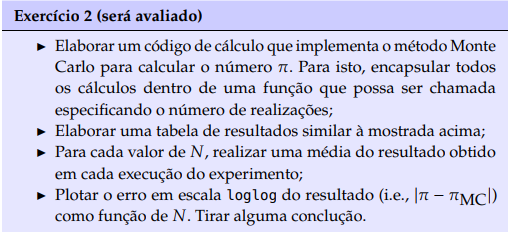

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def find_pi(num_pontos):
    #vamos fazer um quadrado de lado 1 e inscrever 1/4 de circunferência
    #area total = 1
    #area de 1/4 de circunferencia = pi r**2 /4
    # pi é 4 vezes a razão das áreas = 4 vezes a razão do número de pontos dentro/totais * area total

    x = np.random.rand(num_pontos) #gera valores para a coordenada x entre 0 e 1 
    y = np.random.rand(num_pontos) #gera valroes para a coordenada y entre 0 e 1
    raio2 = x**2 + y**2  #distancia quadrada da origem
      
    pi = 4* np.sum(np.int16(raio2<1))/num_pontos
    
    return pi

#em linguagens interpretadas é melhor fazer códgos vetorizados ---> usa códigos pré-compilados

In [3]:
num_pontos_list = [1e3, 1e4,1e5, 1e6, 1e7] #número de pontos a serem considerados
tabela = pd.DataFrame()  #tabela que será preenchida

In [4]:
def find_avg_pi(num_pontos, num_iterations):
    pi_values = [] #armazena valores de pi

    for i in range(num_iterations):   #calcula pi para cada iteração com determinado número de pontos
        pi_values.append(find_pi(num_pontos))

    pi_values = np.array(pi_values)
    tabela[f'N = {num_pontos:.1e}'] = pi_values  #atualiza a tabela

    return (pi_values.mean(), pi_values.std(ddof=1)) #retorna média e desvio padrão

In [5]:
avg_pi_list = []  #valores médios encontrados para cada número de pontos
avg_pi_list_err = [] #erros encontrados para cada número de pontos

num_iterations = 10 #define quantidade de iterações

for num_pontos in num_pontos_list:  #executa o código para cada valor de número de pontos
    pi, pi_err = find_avg_pi(int(num_pontos), num_iterations) #encontra os valores médios
    avg_pi_list.append(pi)              #atualiza as listas
    avg_pi_list_err.append(pi_err)
    print("Feito " + str(num_pontos)) 


Feito 1000.0
Feito 10000.0
Feito 100000.0
Feito 1000000.0
Feito 10000000.0


In [6]:
tabela #exibir tabela encontrada

,N = 1.0e+03,N = 1.0e+04,N = 1.0e+05,N = 1.0e+06,N = 1.0e+07
0,3.088,3.1564,3.13824,3.140372,3.141037
1,3.116,3.1488,3.14180,3.141584,3.141824
2,3.204,3.1492,3.14436,3.141476,3.141488
3,3.176,3.1264,3.14636,3.142456,3.141800
4,3.160,3.1468,3.14852,3.142312,3.141276
5,3.004,3.1300,3.13728,3.142424,3.140757
6,3.056,3.1208,3.14628,3.141676,3.141482
7,3.196,3.1212,3.13784,3.144280,3.141510
8,3.144,3.1476,3.14472,3.141064,3.141160
9,3.192,3.1448,3.14644,3.143200,3.141439


In [7]:
avg_pi_list = np.array(avg_pi_list)
avg_pi_list_err = np.array(avg_pi_list_err)

erro_absoluto = np.abs(avg_pi_list - np.pi) #erro conforme valor de referência
erro_previsto = avg_pi_list_err/np.sqrt(num_iterations) * 3 # erro previsto ---> intervalo de confiança de 95%

[3.1336     3.1392     3.143184   3.1420844  3.14137728]


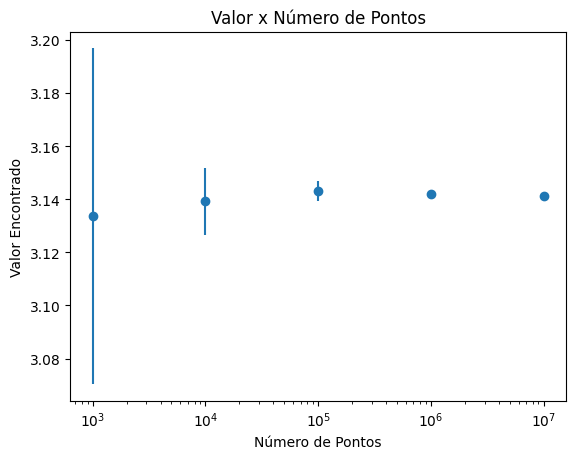

In [8]:
plt.errorbar(num_pontos_list, avg_pi_list, yerr=erro_previsto, marker = 'o', ls = '')  #plot dos valores com erro estimado
plt.xscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Valor Encontrado")
plt.title("Valor x Número de Pontos")

print(avg_pi_list) #valores médios para cada número de pontos

Text(0.5, 1.0, 'Erro x Número de Pontos')

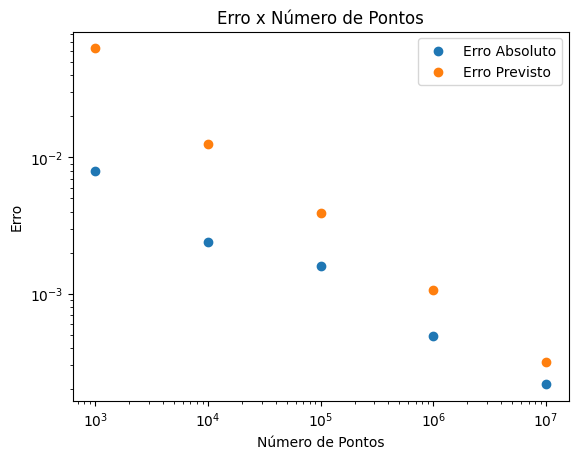

In [9]:
#faz o plot dos erros em escala log-log

plt.scatter(num_pontos_list, erro_absoluto, label = "Erro Absoluto")
plt.scatter(num_pontos_list, erro_previsto, label =  "Erro Previsto")
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Erro")

plt.legend()
plt.title("Erro x Número de Pontos")

Text(0.5, 1.0, 'Erro x Número de Pontos')

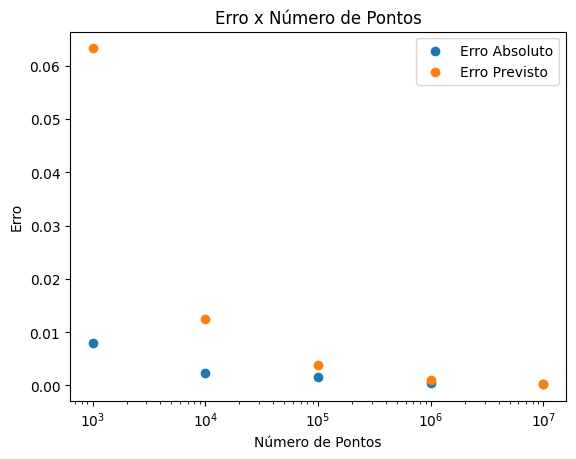

In [10]:
#faz o plot dos erros em escala normal

plt.scatter(num_pontos_list, erro_absoluto, label = "Erro Absoluto")
plt.scatter(num_pontos_list, erro_previsto, label =  "Erro Previsto")
plt.xscale('log')

plt.xlabel("Número de Pontos")
plt.ylabel("Erro")

plt.legend()
plt.title("Erro x Número de Pontos")